In [191]:
import pandas as pd
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import tensorflow as tf
import numpy as np
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.datasets import make_classification
from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import Lasso, LassoCV, LogisticRegression, LinearRegression
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, mean_squared_error, f1_score, ConfusionMatrixDisplay, precision_recall_fscore_support, precision_score, recall_score
from sklearn.model_selection import GridSearchCV, cross_val_score, StratifiedKFold, train_test_split
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier
from sklearn.impute import KNNImputer
from tpot import TPOTRegressor
from tpot import TPOTClassifier
import lime
import lime.lime_tabular
import shap
shap.initjs()

In [192]:
# Load CSV and define target column
csv_to_analyze = "patient_data (1).csv"
target_column = "CardiovascularDisease" #if label is not number use _encoded

df = pd.read_csv(csv_to_analyze)
df.head()

,rs1047763,rs9282541,rs3827760,rs4988235,rs1801133,rs9374842,BMI,CardiovascularDisease
0,0,0,0,0,0,0,28.607859,0
1,0,0,1,1,0,0,26.651948,0
2,1,1,1,0,0,1,31.885502,0
3,0,0,1,0,0,0,29.353686,0
4,1,1,0,0,0,0,33.630251,0


In [193]:
df.describe()

,rs1047763,rs9282541,rs3827760,rs4988235,rs1801133,rs9374842,BMI,CardiovascularDisease
count,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000
mean,0.433333,0.326667,0.490000,0.316667,0.286667,0.276667,28.899291,0.113333
std,0.496364,0.469778,0.500735,0.465953,0.452960,0.448098,5.171930,0.317529
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,13.798057,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,25.292649,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,29.185791,0.000000
75%,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,32.131210,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,44.188743,1.000000


In [194]:
df.dtypes

rs1047763                  int64
rs9282541                  int64
rs3827760                  int64
rs4988235                  int64
rs1801133                  int64
rs9374842                  int64
BMI                      float64
CardiovascularDisease      int64
dtype: object

In [195]:
nan_count = df.isna().sum()
print(nan_count)

rs1047763                0
rs9282541                0
rs3827760                0
rs4988235                0
rs1801133                0
rs9374842                0
BMI                      0
CardiovascularDisease    0
dtype: int64


Value Counts for column 'rs1047763':
rs1047763
0    170
1    130
Name: count, dtype: int64



C:\Users\magda\AppData\Local\Temp\ipykernel_20124\4202474175.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=value_counts.index, y=value_counts.values, palette="viridis")


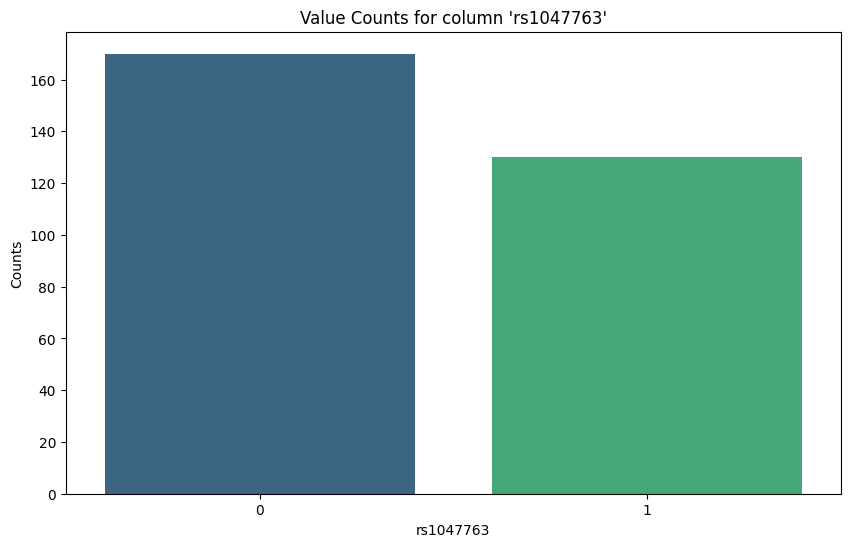

C:\Users\magda\AppData\Local\Temp\ipykernel_20124\4202474175.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=value_counts.index, y=value_counts.values, palette="viridis")


Value Counts for column 'rs9282541':
rs9282541
0    202
1     98
Name: count, dtype: int64



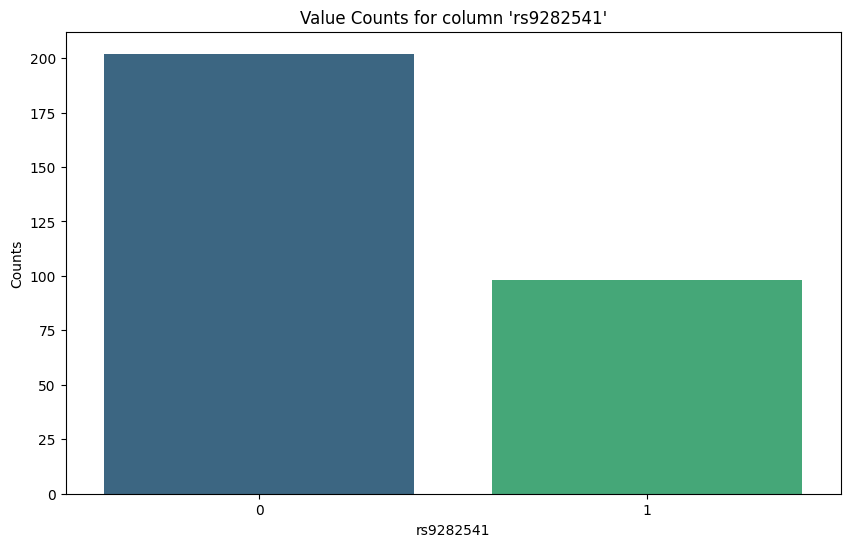

Value Counts for column 'rs3827760':
rs3827760
0    153
1    147
Name: count, dtype: int64



C:\Users\magda\AppData\Local\Temp\ipykernel_20124\4202474175.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=value_counts.index, y=value_counts.values, palette="viridis")


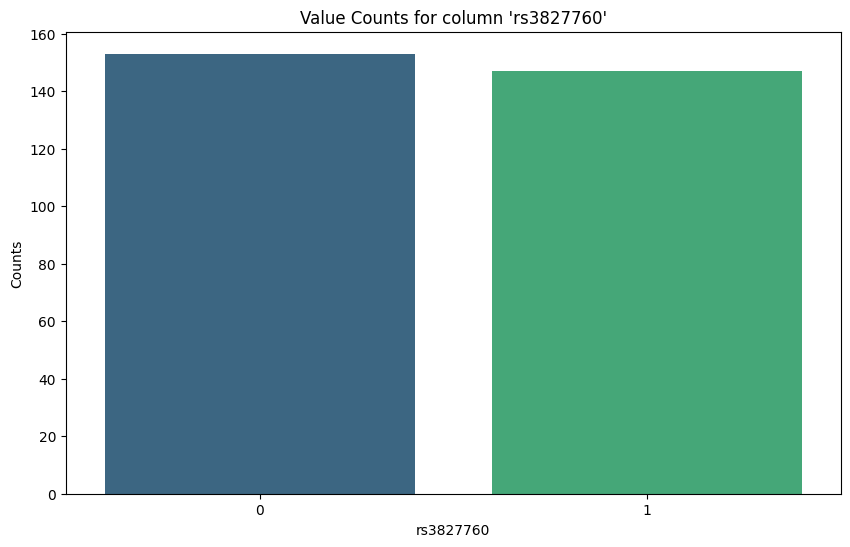

C:\Users\magda\AppData\Local\Temp\ipykernel_20124\4202474175.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=value_counts.index, y=value_counts.values, palette="viridis")


Value Counts for column 'rs4988235':
rs4988235
0    205
1     95
Name: count, dtype: int64



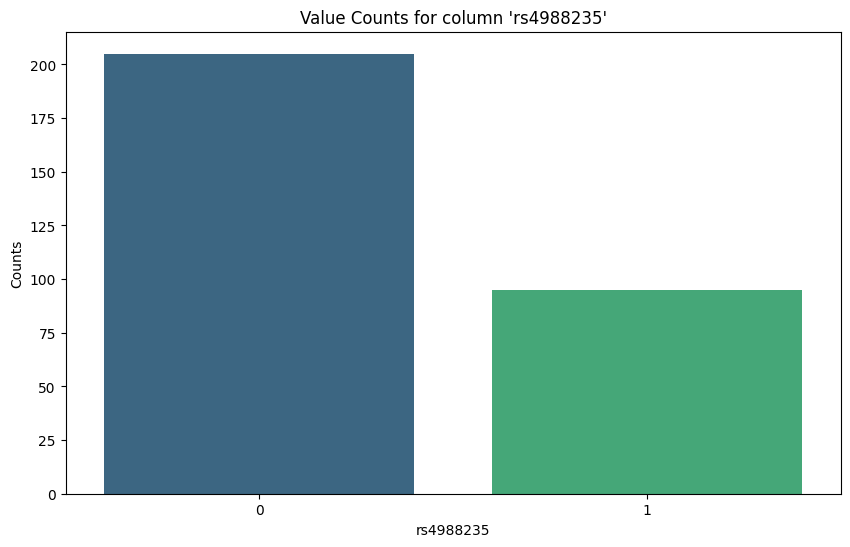

Value Counts for column 'rs1801133':
rs1801133
0    214
1     86
Name: count, dtype: int64



C:\Users\magda\AppData\Local\Temp\ipykernel_20124\4202474175.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=value_counts.index, y=value_counts.values, palette="viridis")


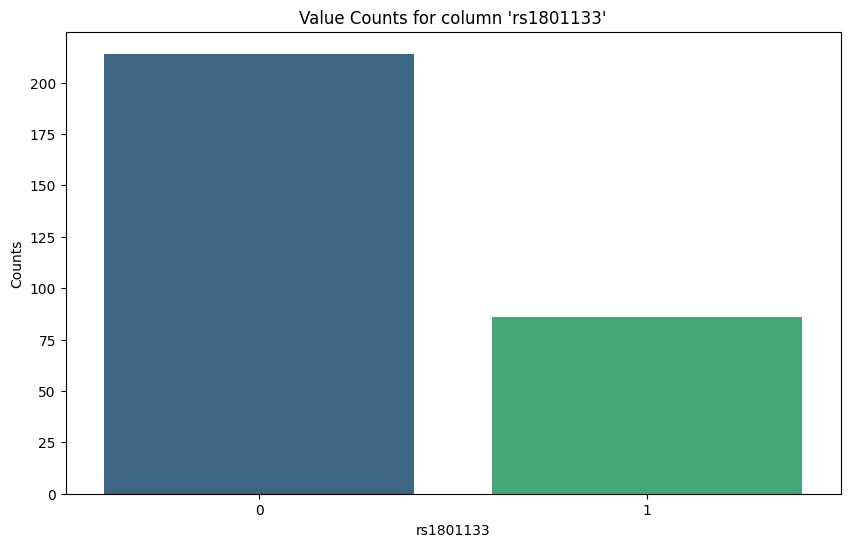

C:\Users\magda\AppData\Local\Temp\ipykernel_20124\4202474175.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=value_counts.index, y=value_counts.values, palette="viridis")


Value Counts for column 'rs9374842':
rs9374842
0    217
1     83
Name: count, dtype: int64



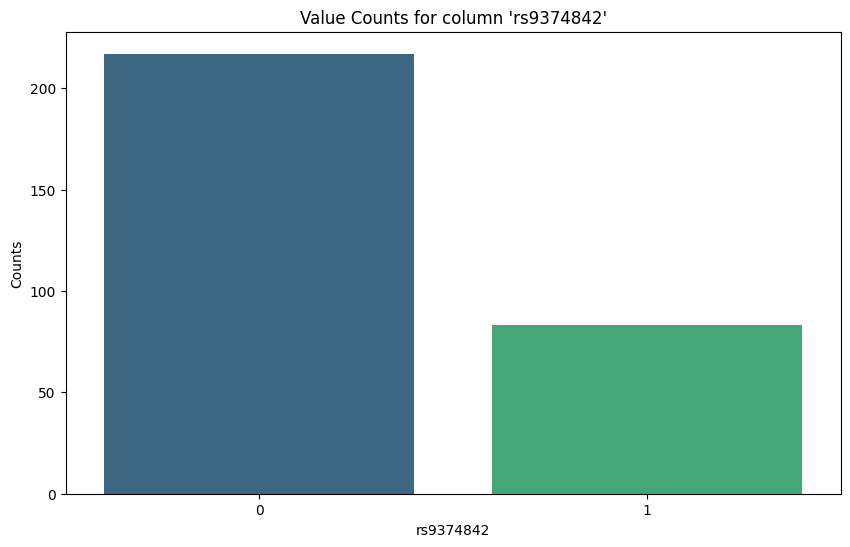

Value Counts for column 'BMI':
BMI
28.607859    1
28.620728    1
29.483726    1
21.857515    1
20.495480    1
            ..
31.261774    1
27.379558    1
23.953588    1
25.026434    1
20.178792    1
Name: count, Length: 300, dtype: int64



C:\Users\magda\AppData\Local\Temp\ipykernel_20124\4202474175.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=value_counts.index, y=value_counts.values, palette="viridis")


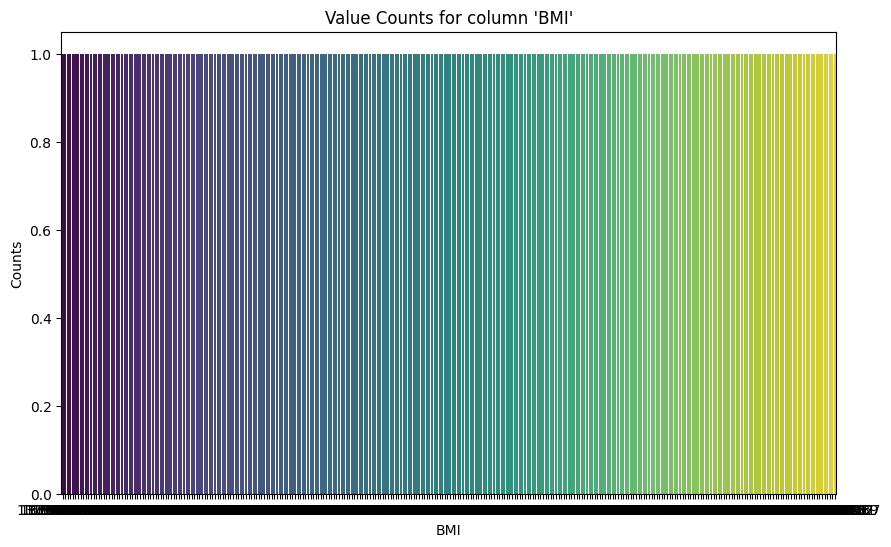

Value Counts for column 'CardiovascularDisease':
CardiovascularDisease
0    266
1     34
Name: count, dtype: int64



C:\Users\magda\AppData\Local\Temp\ipykernel_20124\4202474175.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=value_counts.index, y=value_counts.values, palette="viridis")


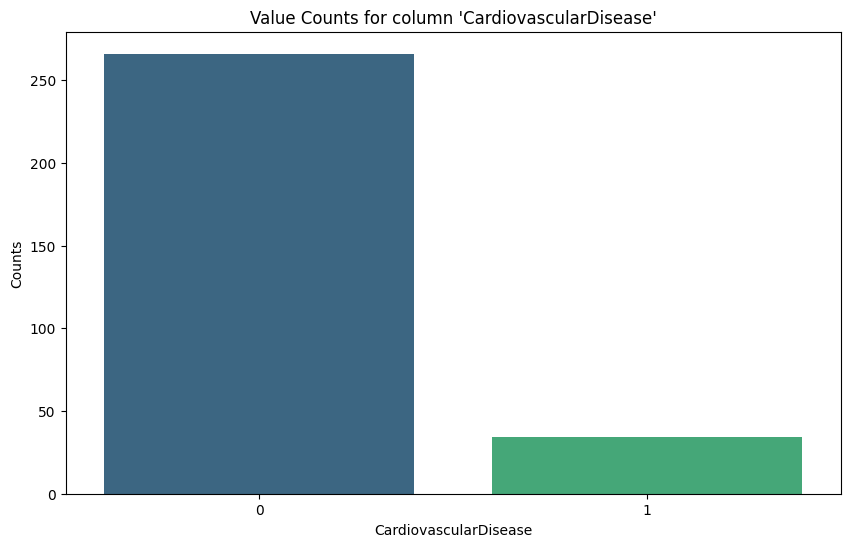

In [140]:
#Shows values of each column and plots it (find differences, often used values, ...)
column_names = df.columns.tolist()
for column_name in column_names:
    value_counts = df[column_name].value_counts()
    print("Value Counts for column '{}':".format(column_name))
    print(value_counts)
    print()

    # Plotting the value counts
    plt.figure(figsize=(10, 6))
    sns.barplot(x=value_counts.index, y=value_counts.values, palette="viridis")
    
    # Adding titles and labels
    plt.title("Value Counts for column '{}'".format(column_name))
    plt.xlabel(column_name)
    plt.ylabel('Counts')
    plt.show()

In [ ]:
#df.loc[:, 'BloodSugarLevel'] = (df['BloodSugarLevel']).astype(int)
#df.loc[:, 'BMI'] = (df['BMI']).astype(int)
# Calculate the mean of the 'InsulinResistance' column
mean_value = df['GeneticFactor'].mean()
df = df[df['GeneticFactor'] != mean_value]

mean_value = df['BloodSugarLevel'].mean()
df = df[df['BloodSugarLevel'] != mean_value]
df = df[df['BloodSugarLevel'] != 105.053928]

mean_value = df['InsulinResistance'].mean()
df = df[df['InsulinResistance'] != mean_value]

mean_value = df['GeneticFactor'].mean()
df = df[df['GeneticFactor'] != mean_value]

#df_include = df.loc[df['BMI'] == 28.052368]
#df = df.loc[(df['BMI']<28.06) & (df['BMI']>28.05)]

mean_value = df['BMI'].mean()
df = df[df['BMI'] != mean_value]
df = df[df['BMI'] != 28.052368]

In [141]:
columnname1 = "rs9374842"
columnname2 = "CardiovascularDisease"
# use ==, !=, <=, >=, <, >, ...

df_include = df.loc[(df[columnname1] == "0") & (df[columnname2] == "1")]
df_rest = df.loc[~((df[columnname1] == "Rarely active; I seldom engage in physical activities.") & (df[columnname2] == "Yes"))]

In [142]:
# count new df
df_include.count()

rs1047763                0
rs9282541                0
rs3827760                0
rs4988235                0
rs1801133                0
rs9374842                0
BMI                      0
CardiovascularDisease    0
dtype: int64

In [143]:
df_rest.count()

rs1047763                300
rs9282541                300
rs3827760                300
rs4988235                300
rs1801133                300
rs9374842                300
BMI                      300
CardiovascularDisease    300
dtype: int64

In [144]:
df_no_physic = df[df[columnname1] == "Rarely active; I seldom engage in physical activities."]

In [145]:
df_no_physic.head()

,rs1047763,rs9282541,rs3827760,rs4988235,rs1801133,rs9374842,BMI,CardiovascularDisease


In [146]:
df_include.head()

,rs1047763,rs9282541,rs3827760,rs4988235,rs1801133,rs9374842,BMI,CardiovascularDisease


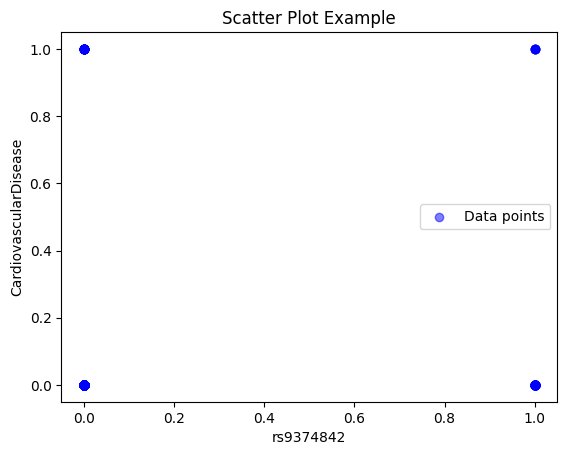

In [168]:
# Scatterplot


# Create a scatter plot
plt.scatter(df[columnname1], df[columnname2], c='blue', alpha=0.5, label='Data points')

# Add title and labels
plt.title('Scatter Plot Example')
plt.xlabel(columnname1)
plt.ylabel(columnname2)
plt.legend()

# Show the plot
plt.show()

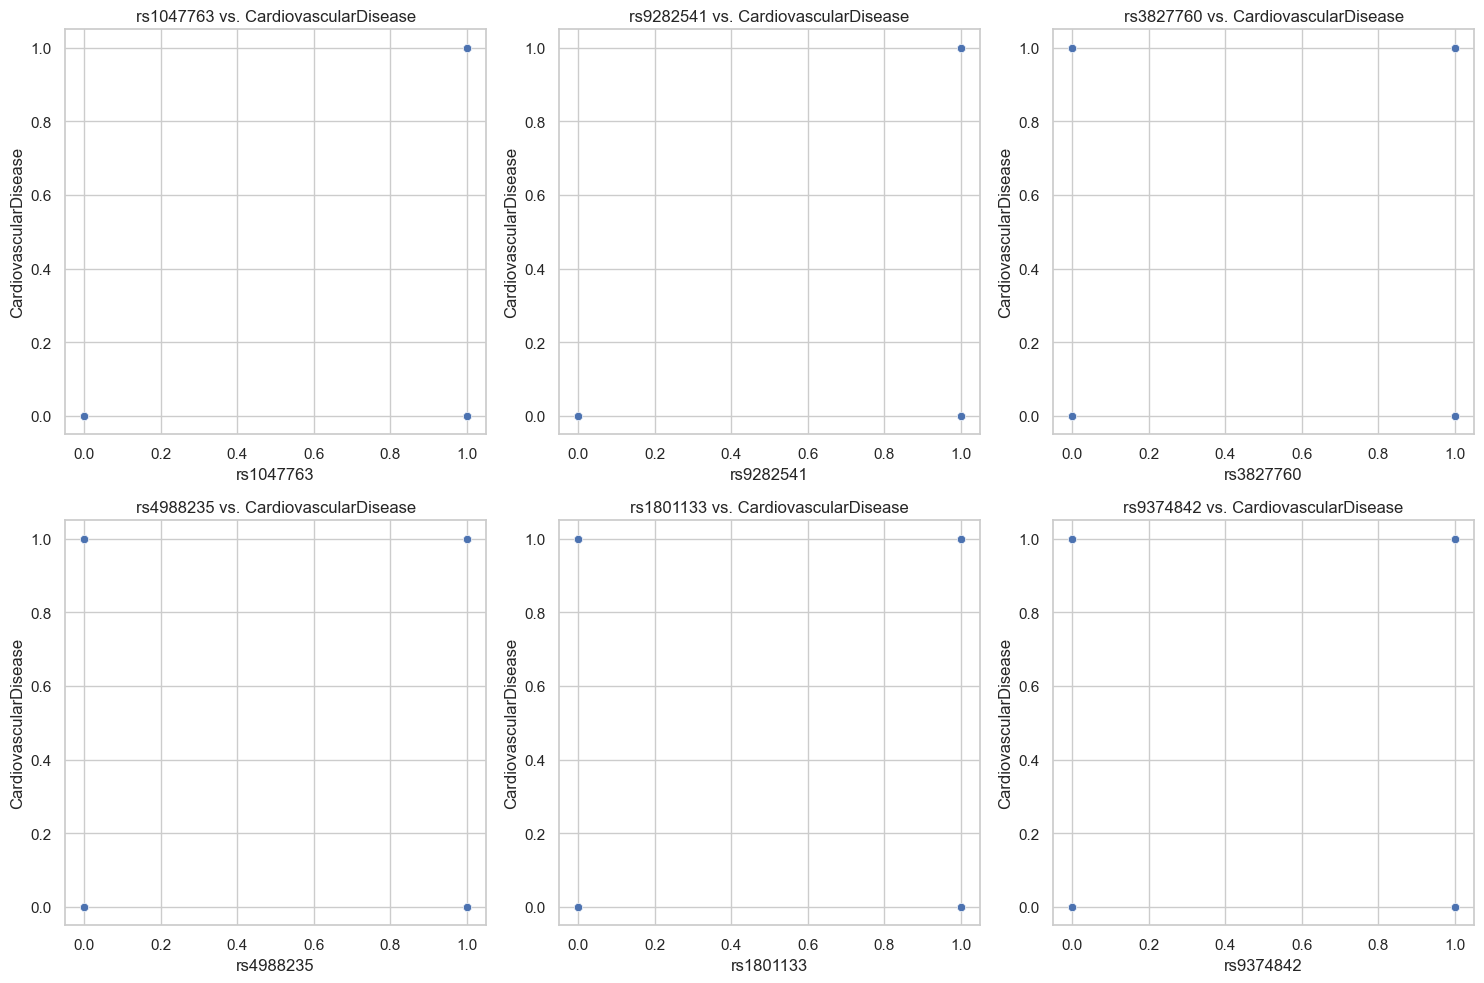

In [198]:
# Set the style of the visualization
sns.set(style="whitegrid")

# Define the list of genetic markers
genetic_markers = ['rs1047763', 'rs9282541', 'rs3827760', 'rs4988235', 'rs1801133', 'rs9374842']

# Create scatterplots for each genetic marker vs. BMI
plt.figure(figsize=(15, 10))

for i, marker in enumerate(genetic_markers, 1):
    plt.subplot(2, 3, i)
    sns.scatterplot(x=df[marker], y=df['CardiovascularDisease'])
    plt.title(f'{marker} vs. CardiovascularDisease')
    plt.xlabel(marker)
    plt.ylabel('CardiovascularDisease')

plt.tight_layout()
plt.show()

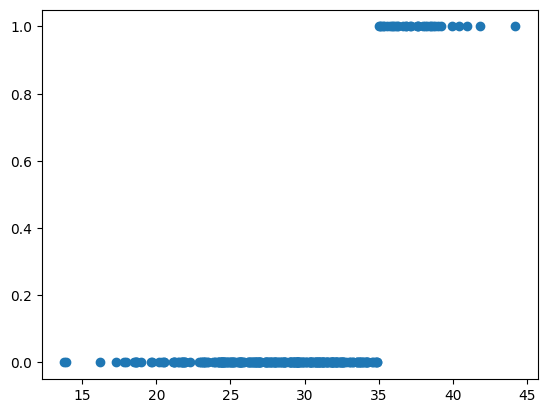

In [169]:
# Create a scatter plot
x=df["BMI"]
y=df["CardiovascularDisease"]
plt.scatter(x, y)
plt.show()

In [149]:
# Drop/Filter data

df_calc = df.loc[df['InsulinResistance'].isin([1, 0])]
df_MIO_BGIS = df_MIO_BGI.loc[(df['BloodSugarLevel']<105.06) & (df['BloodSugarLevel']>105.05)]

KeyError: 'InsulinResistance'

In [170]:
df.dtypes

rs1047763                  int64
rs9282541                  int64
rs3827760                  int64
rs4988235                  int64
rs1801133                  int64
rs9374842                  int64
BMI                      float64
CardiovascularDisease      int64
dtype: object

In [ ]:
# If needed label encoding
# Label encoding
df_le = df
columns_to_encode = df_le.select_dtypes(include=['object', 'category']).columns
label_encoder = LabelEncoder()

for column in columns_to_encode:
    df_le[f'{column}_encoded'] = label_encoder.fit_transform(df_le[column])
df_le = df_le.drop(columns=columns_to_encode)

In [150]:
df_le.dtypes

Age_encoded                            int32
Gender_encoded                         int32
Ethnicity_encoded                      int32
Education Level_encoded                int32
General Health_encoded                 int32
Fruits_Veg_Servings_Per_Day_encoded    int32
Physical_Activity_Per_Week_encoded     int32
Chronic_Diseases_encoded               int32
Physical_Activity_Level_encoded        int32
dtype: object

In [151]:
df_le.head()

,Age_encoded,Gender_encoded,Ethnicity_encoded,Education Level_encoded,General Health_encoded,Fruits_Veg_Servings_Per_Day_encoded,Physical_Activity_Per_Week_encoded,Chronic_Diseases_encoded,Physical_Activity_Level_encoded
0,21,1,2,2,3,2,0,2,1
1,13,1,1,3,2,0,3,0,1
2,39,1,1,2,2,3,2,1,1
3,43,0,3,1,3,3,0,2,1
4,23,1,0,0,1,3,3,2,1


In [152]:
# KNN Classifier imputation adapt!!!!!!!!!!!!!!!!!!!!!!

# Replace non-0/1 values with NaN for the InsulinResistance column
df['InsulinResistance'] = df['InsulinResistance'].apply(lambda x: x if x in [0, 1] else np.nan)

# Separate the rows with NaN values in 'InsulinResistance'
df_missing = df[df['InsulinResistance'].isna()]
df_complete = df.dropna(subset=['InsulinResistance'])

# Features and target for KNN
X = df_complete.drop(columns='InsulinResistance')
y = df_complete['InsulinResistance']

# Train the KNN classifier
knn = KNeighborsClassifier(n_neighbors=2)
knn.fit(X, y)

# Predict the missing values
df_missing['InsulinResistance'] = knn.predict(df_missing.drop(columns='InsulinResistance'))

# Combine the datasets
df_combined = pd.concat([df_complete, df_missing]).sort_index()
df = df_combined

KeyError: 'InsulinResistance'

In [ ]:
df_le = df_le.drop("ID", axis=1)

In [199]:
df_CVD = df.drop("CardiovascularDisease",axis=1)
df_CVD.head(2)

,rs1047763,rs9282541,rs3827760,rs4988235,rs1801133,rs9374842,BMI
0,0,0,0,0,0,0,28.607859
1,0,0,1,1,0,0,26.651948


In [200]:
# Prepare for training and test data
X = df_CVD.drop("BMI", axis=1)
y = df_CVD["BMI"]

#Creating test and train data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train.describe()

,rs1047763,rs9282541,rs3827760,rs4988235,rs1801133,rs9374842
count,240.000000,240.000000,240.000000,240.000000,240.000000,240.000000
mean,0.425000,0.316667,0.504167,0.295833,0.308333,0.291667
std,0.495376,0.466148,0.501028,0.457370,0.462770,0.455480
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
75%,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [201]:
model=LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [202]:
print("Coefficients:", model.coef_)
print("Intercept:", model.intercept_)

Coefficients: [ 4.81230099  4.09644477  0.19672026  0.6646186   0.11057741 -0.5010036 ]
Intercept: 25.325873837444174


In [206]:
explainer=shap.Explainer(model, X_train)
shap_values = explainer(X_train)

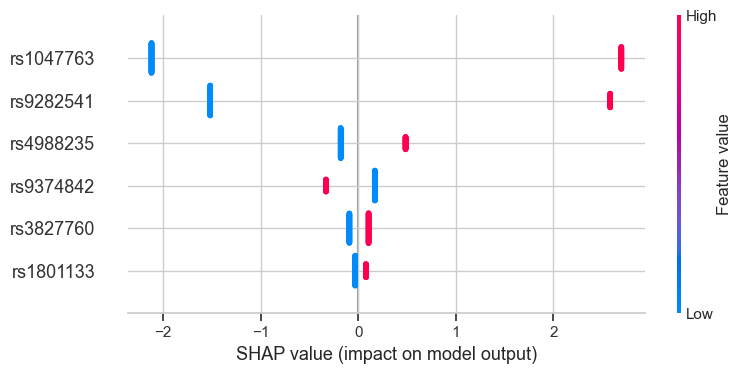

In [210]:
# Summary plot for training data
shap.summary_plot(shap_values, X_train)

shap_values_new = explainer(X_test)

# Force plot for the new prediction
shap.initjs()
shap.force_plot(explainer.expected_value, shap_values_new.values, X_test)

# Show the plots
plt.show()


In [172]:
# Prepare for training and test data
X = df.drop(target_column, axis=1)
y = df[target_column]

#Creating test and train data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train.describe()

TypeError: DataFrame.drop() takes from 1 to 2 positional arguments but 3 positional arguments (and 1 keyword-only argument) were given

In [153]:
# Prepare for training and test data
X = df.drop(target_column, axis=1)
y = df[target_column]

#Creating test and train data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train.describe()

,rs1047763,rs9282541,rs3827760,rs4988235,rs1801133,rs9374842,BMI
count,240.000000,240.000000,240.000000,240.000000,240.000000,240.000000,240.000000
mean,0.425000,0.316667,0.504167,0.295833,0.308333,0.291667,28.852074
std,0.495376,0.466148,0.501028,0.457370,0.462770,0.455480,5.233462
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,13.798057
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,25.292649
50%,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,29.049051
75%,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,32.208752
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,44.188743


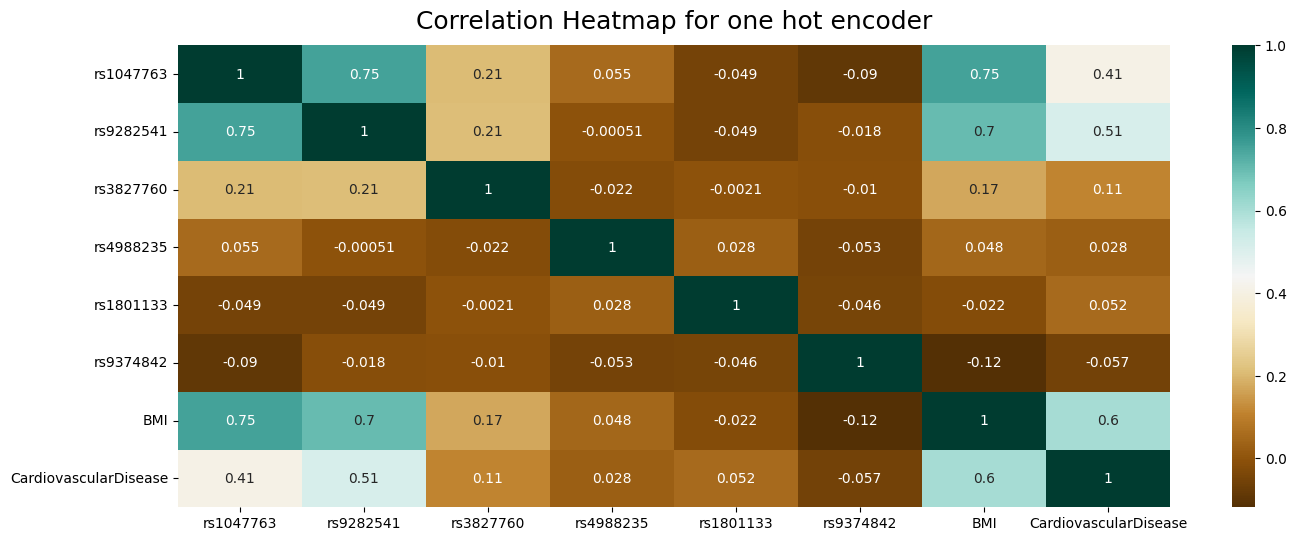

In [157]:
# Heatmap
plt.figure(figsize=(16, 6))
heatmap = sns.heatmap(df.corr(),annot=True, cmap='BrBG') #adapt df if necessary!!!!!
heatmap.set_title('Correlation Heatmap for one hot encoder', fontdict={'fontsize':18}, pad=12);
plt.show()

In [155]:
# Initialize TPOTClassifier
tpot = TPOTClassifier(generations=5, population_size=50, verbosity=2, random_state=42)
tpot.fit(X_train, y_train)
print(tpot.score(X_test, y_test))
tpot.export('tpot_patient_data_analyzer_classifier.ipynb')

Optimization Progress:   0%|          | 0/300 [00:00<?, ?pipeline/s]


Generation 1 - Current best internal CV score: 0.9958333333333332

Generation 2 - Current best internal CV score: 0.9958333333333332

Generation 3 - Current best internal CV score: 0.9958333333333332

Generation 4 - Current best internal CV score: 0.9958333333333332

Generation 5 - Current best internal CV score: 0.9958333333333333

Best pipeline: RandomForestClassifier(input_matrix, bootstrap=True, criterion=entropy, max_features=0.9500000000000001, min_samples_leaf=15, min_samples_split=2, n_estimators=100)
1.0


In [ ]:
# Initialize TPOTRegressor
tpot = TPOTRegressor(generations=5, population_size=50, verbosity=2, random_state=42)

# Fit TPOTRegressor on the training data
tpot.fit(X_train, y_train)

# Evaluate the best pipeline on the test data
print(tpot.score(X_test, y_test))

# Export the optimized pipeline as a Python script
tpot.export('tpot_patient_data_analyzer_regression.ipynb')

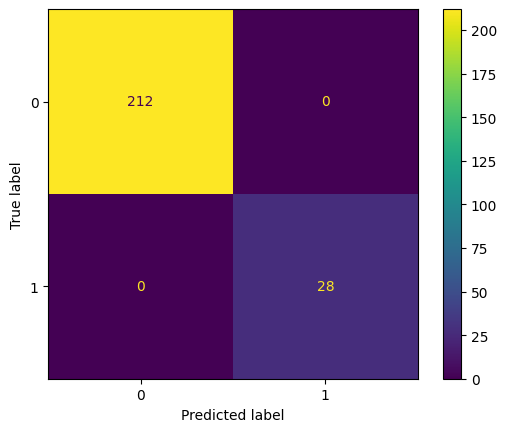

Precision: 1.0
Recall: 1.0
F1-score: 1.0


In [158]:
# Classifiers
clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)
predicted = clf.predict(X_train)

ConfusionMatrixDisplay.from_predictions(y_train, predicted)
plt.show()

precision, recall, fscore, _ = precision_recall_fscore_support(y_train, predicted, average='macro')
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", fscore)

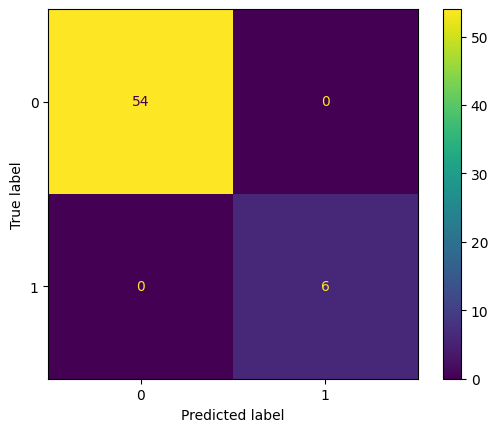

(1.0, 1.0, 1.0, None)

In [159]:
y_pred = clf.predict(X_test)
ConfusionMatrixDisplay.from_predictions(y_test, y_pred)
plt.show()
precision_recall_fscore_support(y_test, y_pred, average='macro')

c:\Users\magda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:386: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(


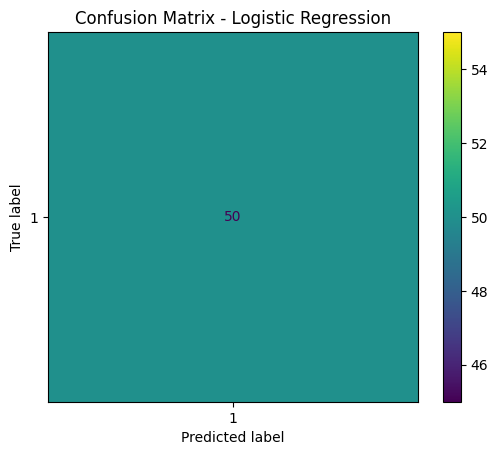

c:\Users\magda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:386: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(


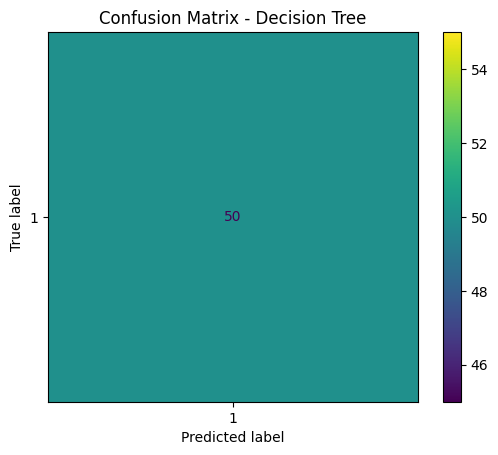

c:\Users\magda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:386: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(


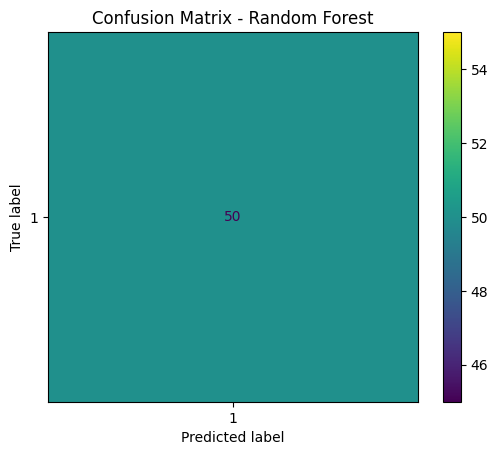

c:\Users\magda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:386: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(


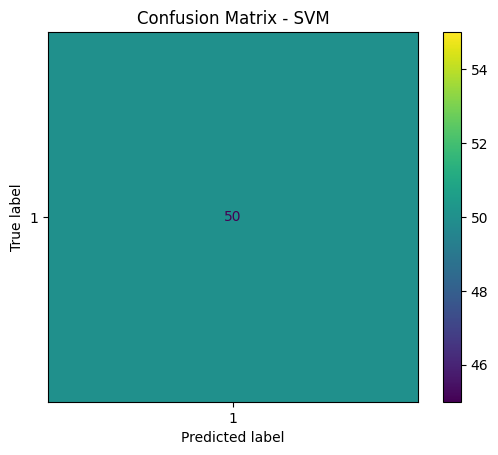

Performance Metrics:
Logistic Regression:
Accuracy: 1.0
F1 Score: 1.0
Precision: 1.0
Decision Tree:
Accuracy: 1.0
F1 Score: 1.0
Precision: 1.0
Random Forest:
Accuracy: 1.0
F1 Score: 1.0
Precision: 1.0
SVM:
Accuracy: 1.0
F1 Score: 1.0
Precision: 1.0


In [ ]:
# Model comparison
models = {
    'Logistic Regression': LogisticRegression(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'SVM': SVC()
}

results = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    results[name] = {'accuracy': accuracy, 'f1': f1, 'precision': precision}
    ConfusionMatrixDisplay.from_predictions(y_test, y_pred)
    plt.title(f'Confusion Matrix - {name}')
    plt.show()

print("Performance Metrics:")
for name, metrics in results.items():
    print(f"{name}:")
    print(f"Accuracy: {metrics['accuracy']}")
    print(f"F1 Score: {metrics['f1']}")
    print(f"Precision: {metrics['precision']}")

In [160]:
# Data Explainer

# Specialized for Tree-based Models: shap.TreeExplainer is specifically optimized for tree-based models,
# such as decision trees, random forests, gradient boosted trees (e.g., XGBoost, LightGBM, CatBoost).
# Other than that use: explainer = shap.Explainer(model, X_train); shap_values = explainer(X_test)

#!!!! adapt maybe model to clf

explainer=shap.TreeExplainer(clf)
shap_values = explainer(X_test)


In [165]:
np.shape(shap_values.values)
id_to_explain = 0
output_to_explain = 1


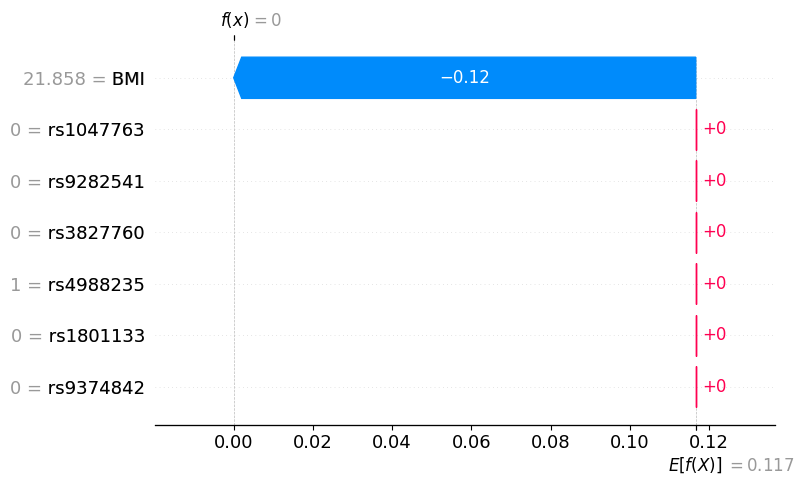

In [166]:
shap.plots.waterfall(shap_values[id_to_explain,:,output_to_explain])

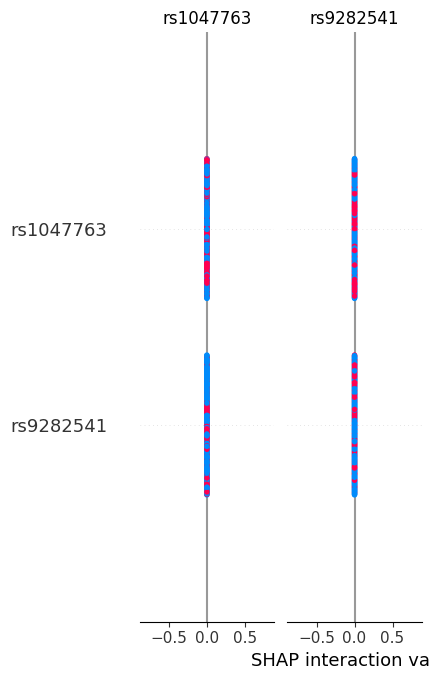

In [ ]:
explainer = shap.TreeExplainer(clf)
shap_values = explainer.shap_values(X_train)
shap.summary_plot(shap_values, X_train, plot_type="bar")

In [ ]:
explainer_lime = lime.lime_tabular.LimeTabularExplainer(X_train.values, mode="classification", feature_names=X_train.columns)
i = 1  # Choose an instance to explain
exp = explainer_lime.explain_instance(X_train.values[i], clf.predict_proba, num_features=len(X_train.columns))
exp.show_in_notebook()

c:\Users\magda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


In [ ]:
# Compute and plot SHAP values for a single prediction
choosen_instance = X_test.iloc[0]
shap_values_instance = explainer.shap_values(choosen_instance)
shap.initjs()
shap.plots.force(explainer.expected_value[0], shap_values)

IndexError: list index out of range

In [ ]:
expl=shap.TreeExplainer(clf)
vals= expl(X_test)
shap.plots.waterfall(vals[0])

expl=shap.TreeExplainer(clf)
vals= expl(X_test)
shap.plots.waterfall(vals[1])

ValueError: The waterfall plot can currently only plot a single explanation, but a matrix of explanations (shape (7, 2)) was passed! Perhaps try `shap.plots.waterfall(shap_values[0])` or for multi-output models, try `shap.plots.waterfall(shap_values[0, 0])`.

In [ ]:
import shap

explainer = shap.Explainer(clf, X_train)
shap_values = explainer.shap_values(X_test)

# the waterfall_plot shows how we get from shap_values.base_values to model.predict(X)[sample_ind]
#shap.plots.beeswarm(shap_values)

IndexError: index 156 is out of bounds for axis 0 with size 60

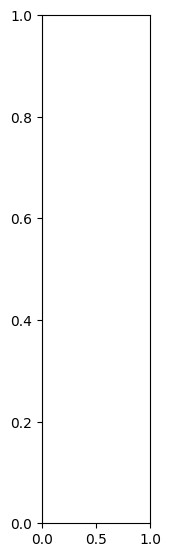

In [ ]:
shap.summary_plot(shap_values, X_test)

In [ ]:
shap.plots.waterfall(shap_values)

TypeError: The waterfall plot requires an `Explanation` object as the `shap_values` argument.

In [ ]:
shap.plots.partial_dependence(
    '',  # Index or name of the feature
    clf.predict,  # Model prediction function
    X_test,         # Data to use for the plot
    model_expected_value=True,  # Whether to show the expected value of the model
    feature_expected_value=True # Whether to show the expected value of the feature
)

In [ ]:
shap.plots.bar(shap_values)

TypeError: The shap_values argument must be an Explanation object, Cohorts object, or dictionary of Explanation objects!

In [ ]:
import lime
import lime.lime_tabular

#LIME for ZSN = 0
explainer=lime.lime_tabular.LimeTabularExplainer(X_train.values, feature_names=X_train.columns.values.tolist(), class_names=[0,1], verbose=True, mode='classification')
exp=explainer.explain_instance(X_test.values[idx0], model.predict_proba, num_features=6)
exp.show_in_notebook(show_table=True)

#LIME for ZSN = 1
explainer=lime.lime_tabular.LimeTabularExplainer(X_train.values, feature_names=X_train.columns.values.tolist(), class_names=[0,1], verbose=True, mode='classification')
exp=explainer.explain_instance(X_test.values[idx1], model.predict_proba, num_features=6)
exp.show_in_notebook(show_table=True)

ModuleNotFoundError: No module named 'lime'